# Plectre (Synthesis of Guitar by digital waveguides : modeling the plectrum in the physical interaction of the player with the instrument, par Germain et Evangelista)

La corde est lâchée avec une hauteur de 0.0001515276697946949 mm suivant ey
La corde est lâchée avec une hauteur de 6.0448268479019806e-05 mm suivant ey


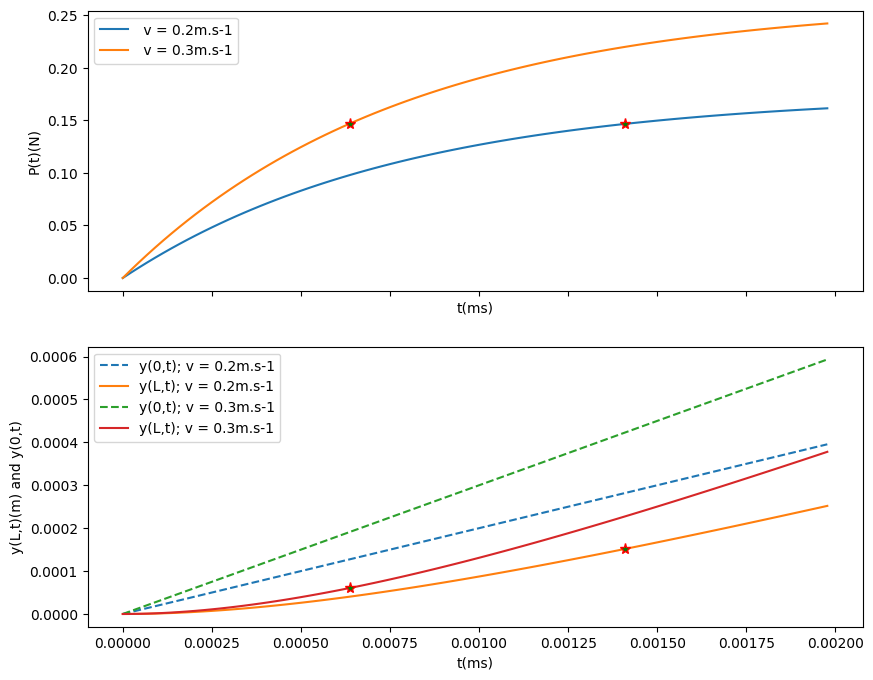

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

#Paramètres de corde
K = 82.3339 # Tension en N
mu = 2.333 # Masse linéique en g.m-1
Z = 0.43826 # Impedance en N.s.m-1
alpha = 779.16e-6 # coefficient alpha en micro secondes
f = 0.025 #coefficient de friction adimensionné



#Paramètres de plectre (=poutre)
L = 10 #longueur en mm
l = 1 #largueur en mm
h = 1 #hauteur en mm
S = 1 #scetion en mm2
I = 0.08333 #moment d'inertie en mm4
rho = 1455 # densité en kg.m-3
E = 4.5e6 #module d'Young en Pa
Prel = (4*Z*L)/3*f

#Paramètres de simulation
Fs = 44100 # Fréquence d'échantillonnage en Hz
duration = 0.002  # Durée de la simulation (s)
T = 1/Fs     # Intervalle d'échantillonnage (s)
N = int(duration * Fs)  # Nombre d'échantillons


#Signal d'excitation à vitesse contante
v= [0.2,0.3] #vitesse de la main en m.s-1
t = np.linspace(0, duration, int(Fs * duration), endpoint=False)  # Temps en secondes
t_r=[]


fig, [ax, ax1] = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
for i, v_g in enumerate(v):
    P_t = 2*Z*v_g*(1-np.exp(-t/alpha)) # force du plectre
    g_t = v_g*t #déplacement de la main
    y_L_t = v_g*t - alpha*v_g*(1-np.exp(-t/alpha)) #déplacement du bout du plectre/corde au point de contact

    # Calcul du point de release
    for j in range(len(P_t)):
        if P_t[j] >=Prel : 
            t_r.append([t[j], j])
            break

    m = t_r[-1][-1]
   
    ax.plot(t,P_t, label = " v = "+str(v_g)+"m.s-1")
    ax1.plot(t,g_t, '--', label = "y(0,t); v = "+str(v_g)+"m.s-1")
    ax1.plot(t,y_L_t, label = "y(L,t); v = "+str(v_g)+"m.s-1")
    ax.plot(t[m], P_t[m], "-*b", markersize=8, markeredgecolor="red", markerfacecolor="green")
    ax1.plot(t[m], y_L_t[m], "-*b", markersize=8, markeredgecolor="red", markerfacecolor="green")

    print("La corde est lâchée avec une hauteur de "+str(y_L_t[m]), "mm suivant ey")


ax.set_xlabel("t(ms)")
ax.set_ylabel("P(t)(N)")
ax.legend()

ax1.set_xlabel("t(ms)")
ax1.set_ylabel("y(L,t)(m) and y(0,t)")
ax1.legend()
plt.show()

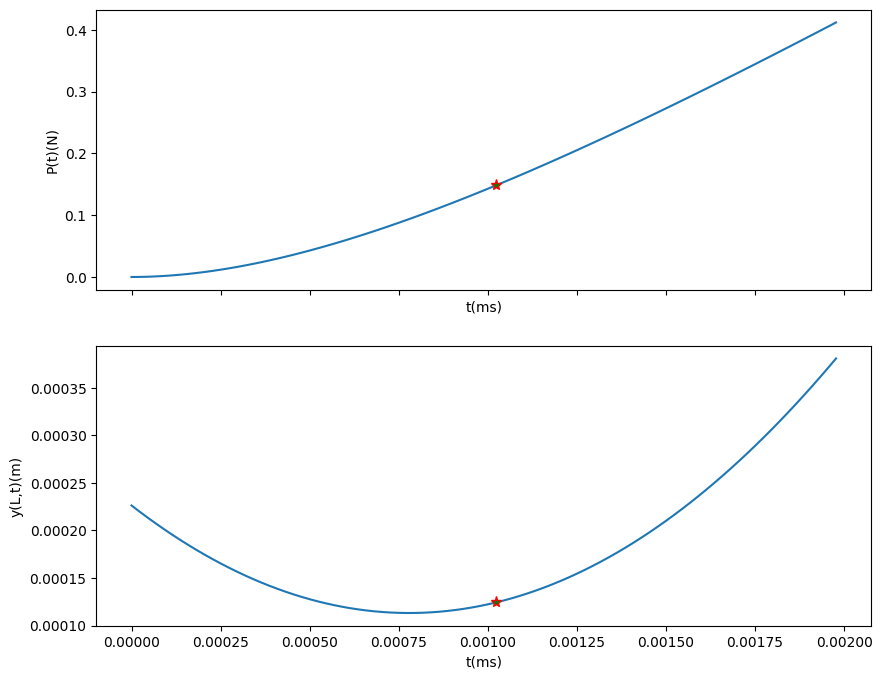

In [13]:
# Signal d'excitation à vitesse variable et accélération constante
a = 373 #accélération constante en m.s-2
v = a*t #profil de vitesse de la main en m.s-1
P_t = (2*Z/alpha)*np.exp(-t/alpha)*  ( a*alpha*  (  (t-alpha)*np.exp(t/alpha) + alpha)  )
y_L_t = (a/2) *np.exp(-t/alpha) * ( np.exp(t/alpha) * (2*alpha**2 + t**2 - 2*alpha*t) - 2*(alpha**3))


# Calcul du point de release
for j in range(len(P_t)):
    if P_t[j] >=Prel : 
        t_r.append([t[j], j])
        break
m = t_r[-1][-1]

fig, [ax, ax1] = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax.plot(t, P_t)
ax.set_xlabel("t(ms)")
ax.set_ylabel("P(t)(N)")
ax.plot(t[m], P_t[m], "-*b", markersize=8, markeredgecolor="red", markerfacecolor="green")


ax1.plot(t, y_L_t)
ax1.set_xlabel("t(ms)")
ax1.set_ylabel("y(L,t)(m)")
ax1.plot(t[m], y_L_t[m], "-*b", markersize=8, markeredgecolor="red", markerfacecolor="green")
plt.show()

# Pulpe du doigt ( A model of harp plucking, par Delphine Chadefaux)

In [30]:
# Paramètres de corde 


# Paramètres de doigt


# Paramètres d'accrochage

